In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load and preprocess the customer data
customer_data = pd.read_csv('cust_seg.csv')


In [2]:
customer_data.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [3]:
customer_data.dtypes

Unnamed: 0           int64
Customer Id          int64
Age                  int64
Edu                  int64
Years Employed       int64
Income               int64
Card Debt          float64
Other Debt         float64
Defaulted          float64
DebtIncomeRatio    float64
dtype: object

In [4]:
#Removing missing values 
customer_data.dropna(inplace = True)

#Remove customer IDs from the data set
df2 = customer_data.iloc[:,2:]
df2.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2


In [5]:
# Select relevant features for clustering
selected_features = ['Age', 'Edu', 'Years Employed', 'Income', 'Card Debt', 'Other Debt', 'Defaulted', 'DebtIncomeRatio']
X = df2[selected_features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Perform K-means clustering
k = 3  # Number of clusters to create
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Assign cluster labels to the data
cluster_labels = kmeans.labels_

# Add the cluster labels to the customer data
df2['Cluster'] = cluster_labels

# Explore the resulting clusters
cluster_centers = kmeans.cluster_centers_
for i in range(k):
    cluster_data = df2[df2['Cluster'] == i]
    print(f"Cluster {i+1}:\n{cluster_data}\n")

c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster 1:
     Age  Edu  Years Employed  Income  Card Debt  Other Debt  Defaulted  \
2     33    2              10      57      6.111       5.802        1.0   
10    44    3               8      88      0.285       5.083        1.0   
14    28    3               2      20      0.233       1.647        1.0   
22    28    3               6      47      5.574       3.732        1.0   
32    23    2               0      42      1.019       0.619        1.0   
..   ...  ...             ...     ...        ...         ...        ...   
816   36    2               6      27      0.262       0.980        1.0   
823   27    4               0      25      1.419       1.756        1.0   
824   41    2               4      26      1.473       3.519        1.0   
830   33    1              13      52      2.714       8.362        1.0   
847   25    4               0      18      2.802       3.210        1.0   

     DebtIncomeRatio  Cluster  
2               20.9        0  
10               6.1    

# PART II

In [8]:
clusters = df2.groupby('Cluster')

In [9]:
cluster_stats = clusters.describe()
cluster_stats

Age                                                       Edu  \
         count       mean       std   min   25%   50%   75%   max  count   
Cluster                                                                    
0        161.0  31.366460  7.714183  20.0  25.0  29.0  36.0  55.0  161.0   
1        125.0  43.112000  6.102903  26.0  39.0  43.0  47.0  56.0  125.0   
2        414.0  33.727053  6.881592  20.0  29.0  33.0  39.0  53.0  414.0   

                   ... Defaulted      DebtIncomeRatio                       \
             mean  ...       75%  max           count       mean       std   
Cluster            ...                                                       
0        1.850932  ...       1.0  1.0           161.0  13.936025  7.444860   
1        1.960000  ...       0.0  1.0           125.0  14.398400  7.621023   
2        1.601449  ...       0.0  0.0           414.0   7.581884  4.726248   

                                      
         min  25%    50%   75%   max  
Cluster                               
0        0.9  8.2  13.20  18.4  35.3  
1        2.3  8.5  13.40  18.7  41.3  
2        0.4  4.2   6.65  10.1  23.8  

[3 rows x 64 columns]

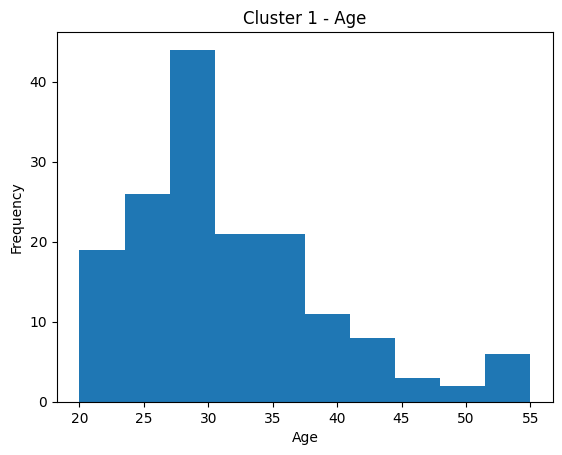

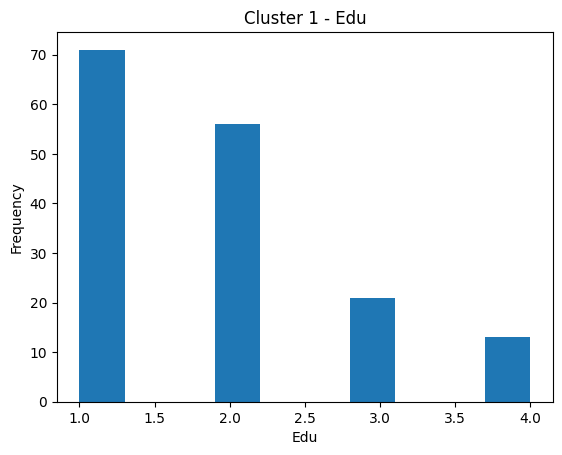

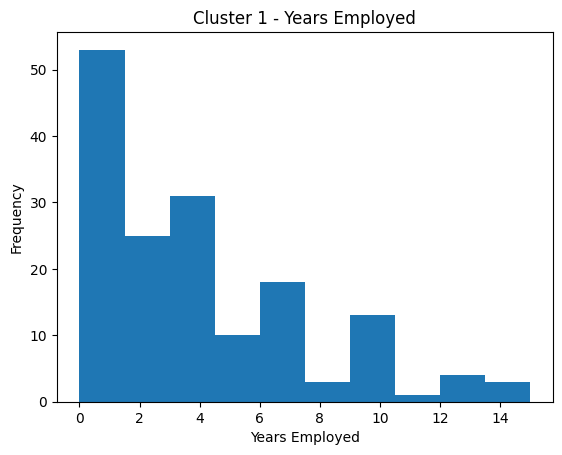

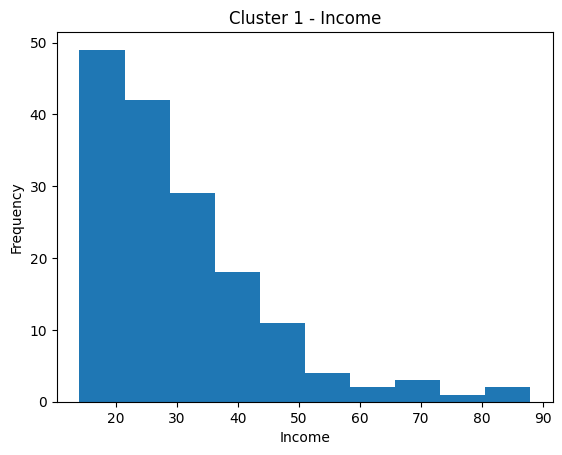

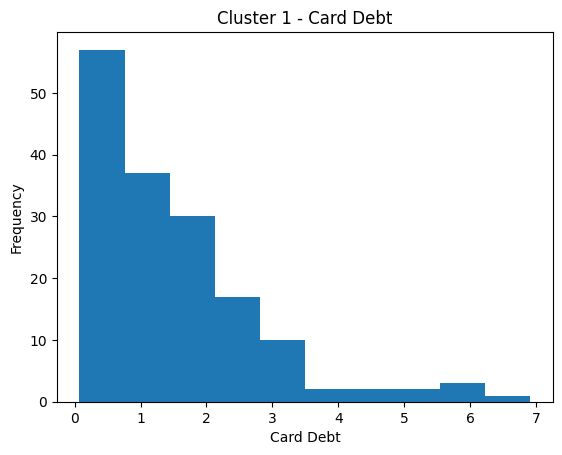

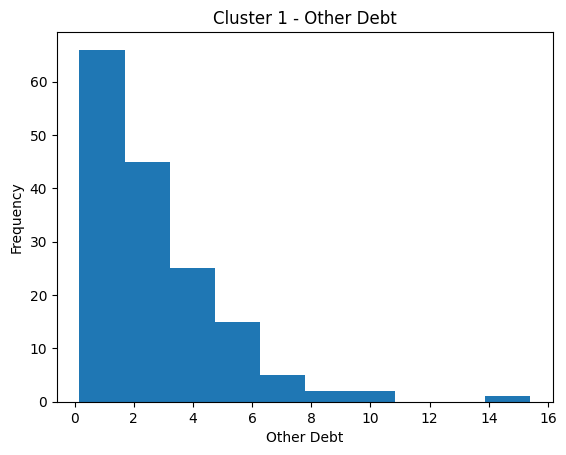

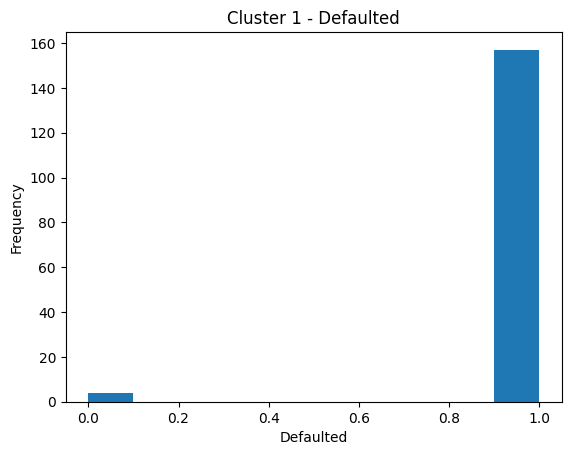

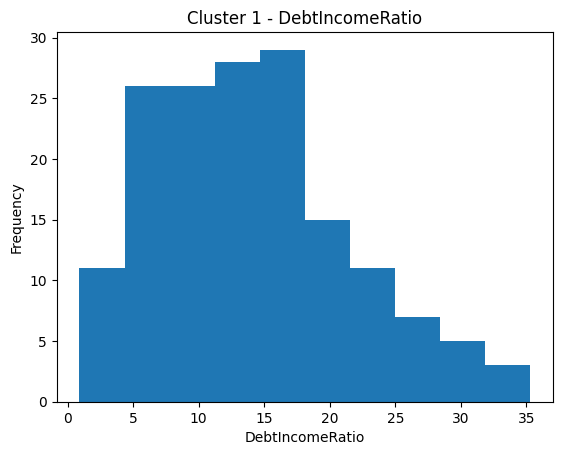

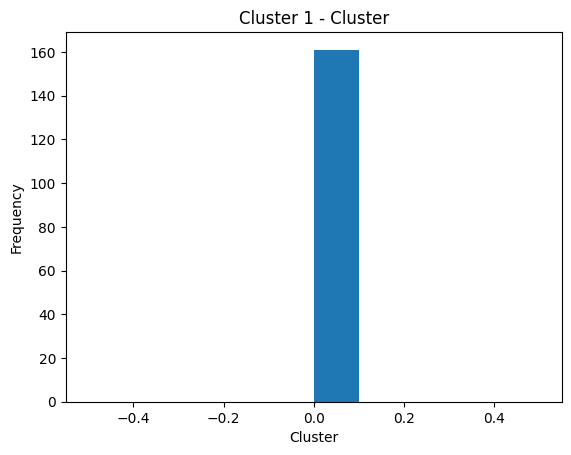

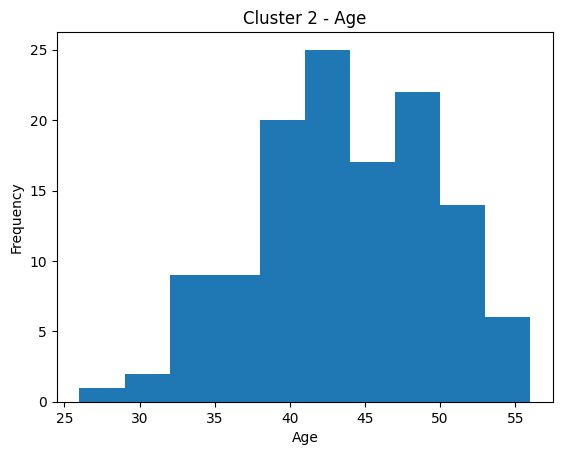

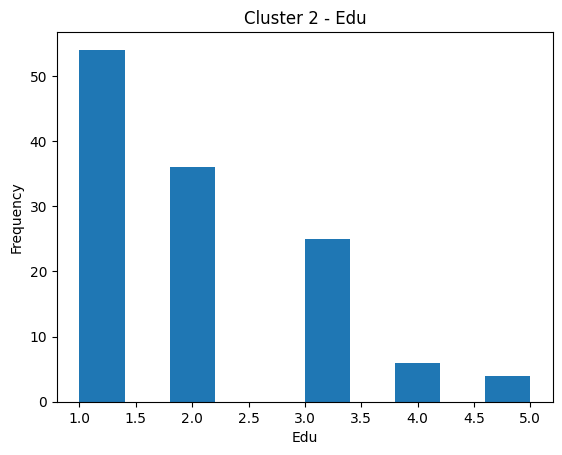

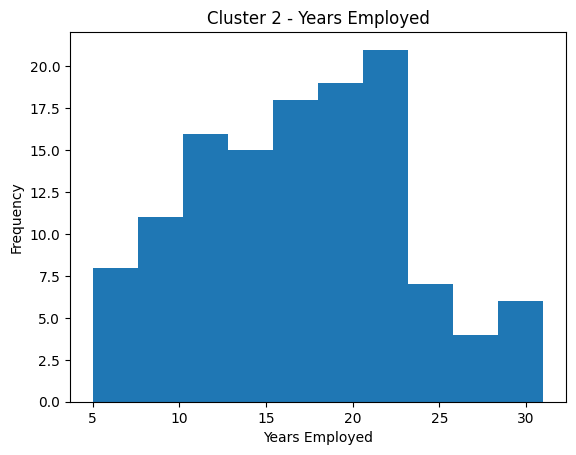

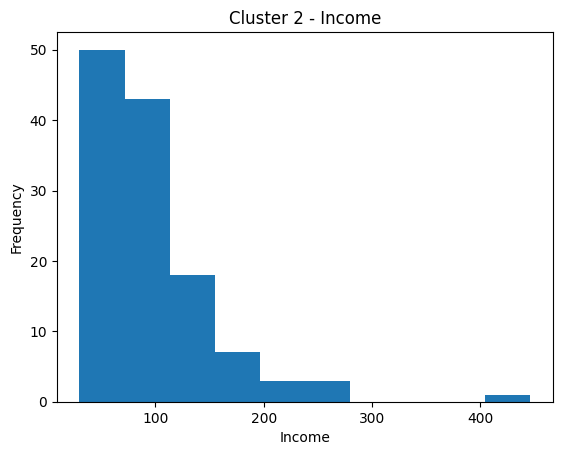

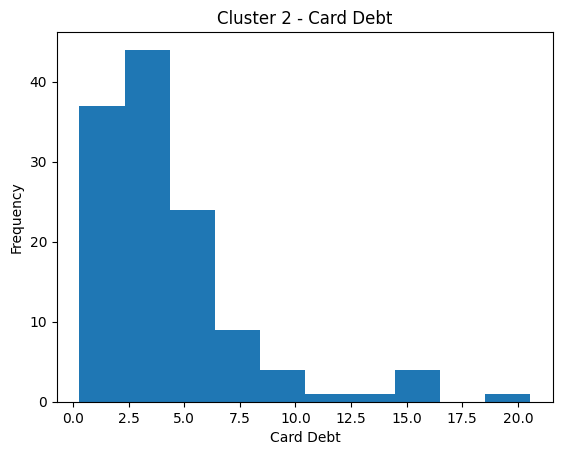

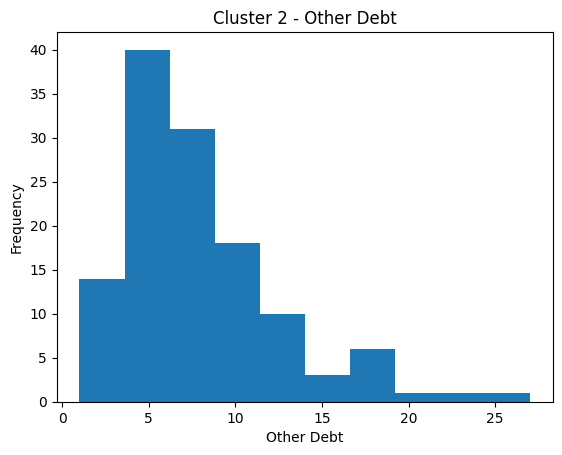

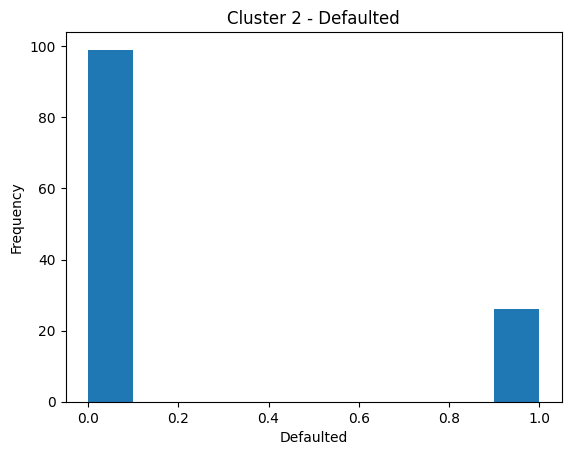

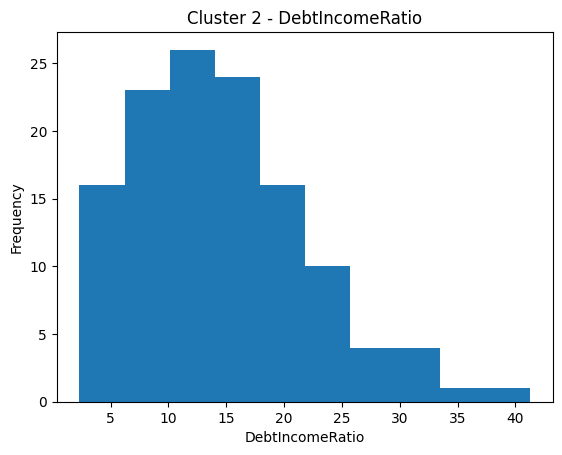

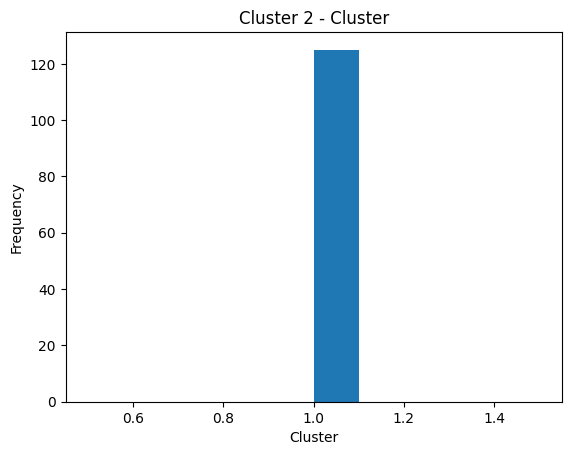

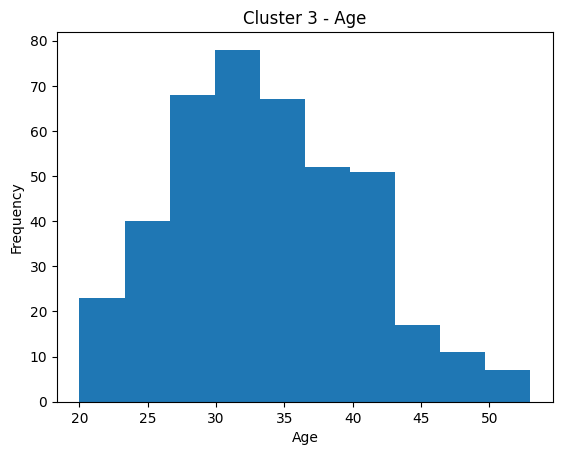

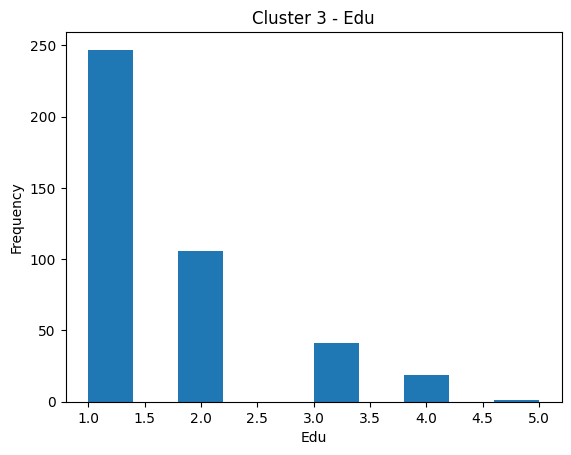

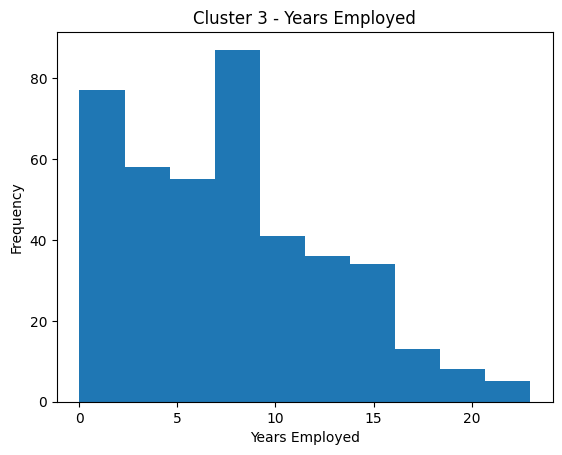

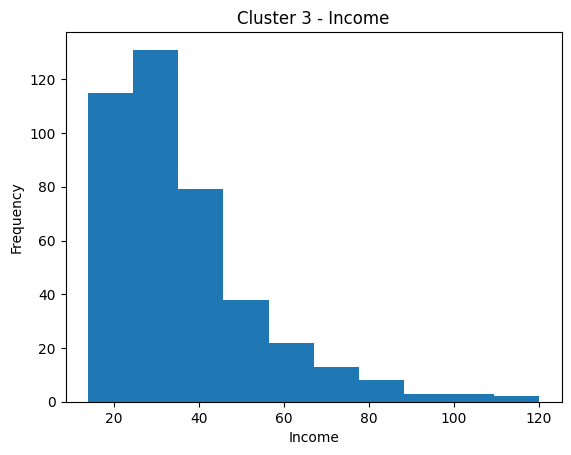

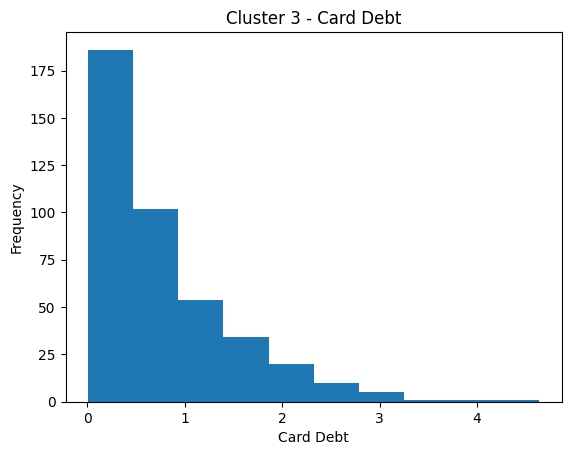

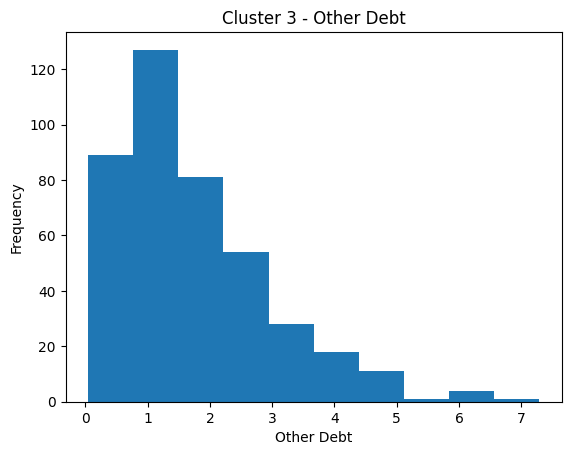

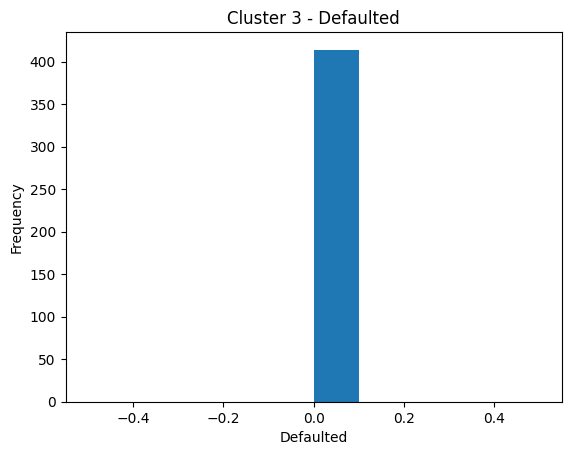

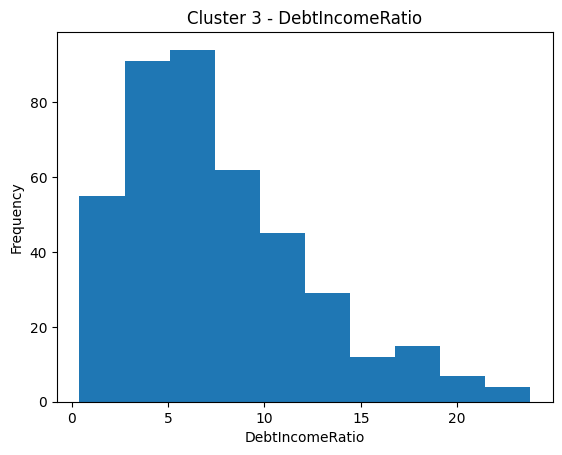

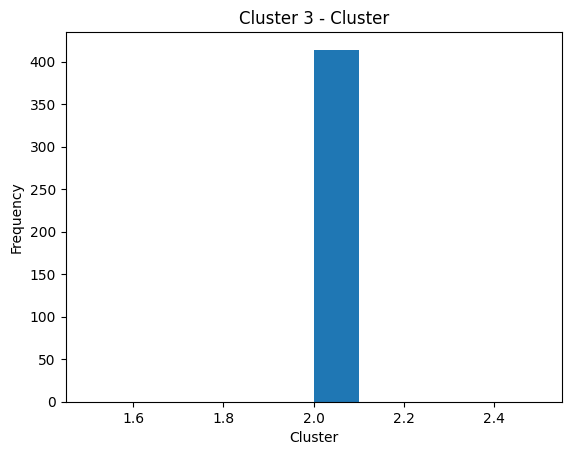

In [10]:
import matplotlib.pyplot as plt

# Iterate over the clusters and features to create visualizations for each combination

for cluster_num, cluster_data in clusters:
    for feature in cluster_data.columns:
        plt.figure()
        cluster_data[feature].plot(kind='hist')
        plt.title(f"Cluster {cluster_num + 1} - {feature}")
        plt.xlabel(feature)
        plt.show()

In [ ]:
# PART V

In [11]:
from sklearn.cluster import AgglomerativeClustering

# Perform hierarchical clustering
k = 2  # Number of clusters to create
hierarchical_clustering = AgglomerativeClustering(n_clusters=k)
hierarchical_clustering.fit(X_scaled)

# Assign cluster labels to the data
cluster_labels = hierarchical_clustering.labels_

# Add the cluster labels to the customer data
df2['HierarchicalCluster'] = cluster_labels

cluster_counts = df2['HierarchicalCluster'].value_counts()
print(cluster_counts)

0    587
1    113
Name: HierarchicalCluster, dtype: int64


Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram')

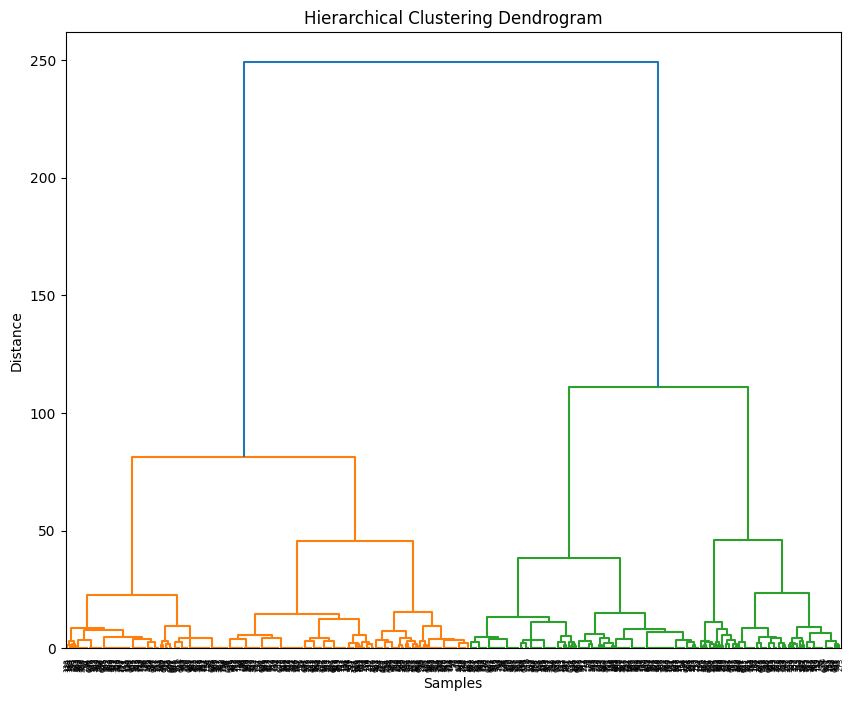

In [14]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Perform hierarchical clustering and obtain the linkage matrix
linkage_matrix = sch.linkage(df2[['Age', 'Edu']], method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 8))
dendrogram = sch.dendrogram(linkage_matrix)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')

